### Initial visualization and exploration of the Data.

In [1]:
#General libraries
import numpy as np
import pandas as pd
import pickle

#libraries for text manipulation
import nltk 
from nltk.corpus import stopwords
from os import path 
from readability import Readability
nltk.download('stopwords')

#graphing and viz
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/richard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Take a peak at the imported data

In [4]:
df = pd.read_csv("../../Data/TextData.csv") # sneak a peak at the top of the file
df.head()

Text  Category
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business

In [5]:
print("There are {} articles and {} categories in this dataset. \n".format(df.shape[0],len(df.Category.unique())))

There are 2225 articles and 5 categories in this dataset. 



### Let's see how many of each category there are to check for class imbalance. 

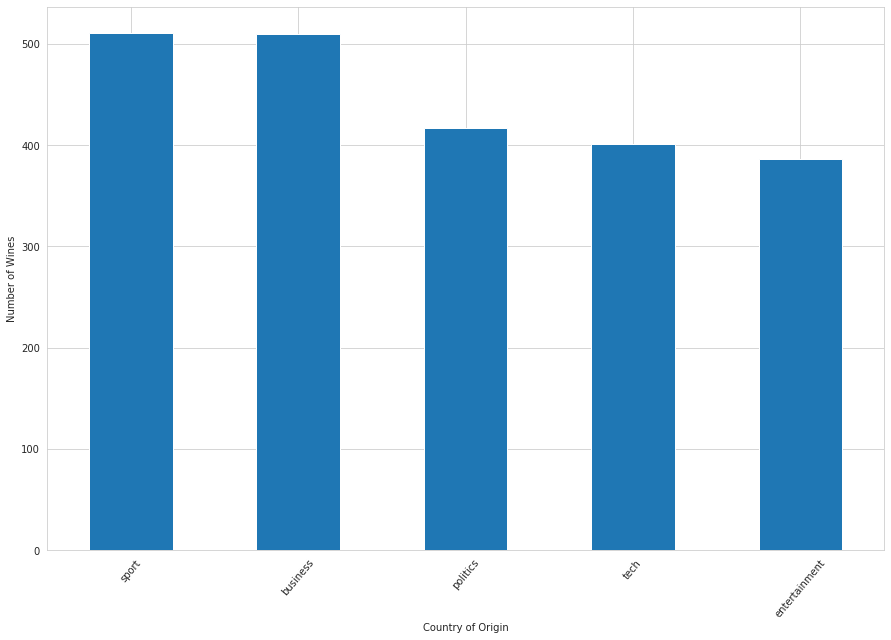

In [6]:
cats = df.groupby("Category")

plt.figure(figsize=(15,10))
cats.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

### Now let's look at the average length of an article, then by category.

In [8]:
df['Length'] = df['Text'].str.len()

df['Length'].describe()

count     2225.000000
mean      2264.161798
std       1364.095149
min        502.000000
25%       1447.000000
50%       1966.000000
75%       2803.000000
max      25484.000000
Name: Length, dtype: float64

### Let's look at the length of each article as distributions.

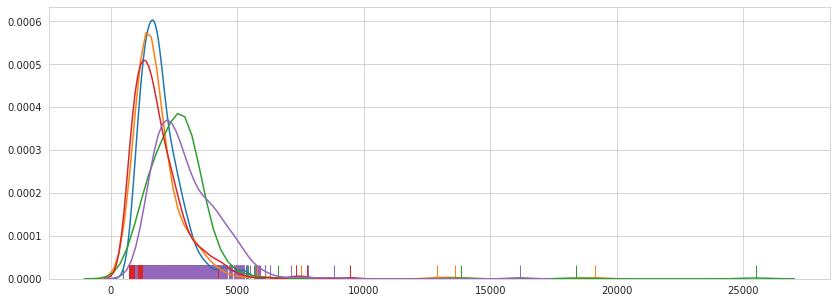

In [9]:
plt.figure(figsize=(14,5))
uniques = df['Category'].unique()  # [0, 1, 2]
targets = [df.loc[df['Category'] == val] for val in uniques]
for target in targets:
    sns.distplot(target[['Length']], hist=False, rug=True)

### Let's check for statistical significance of the article length, and visualize it with box plots and the wonderful statannot package.

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

business v.s. entertainment: Mann-Whitney-Wilcoxon test two-sided P_val=4.702e-05 U_stat=1.140e+05
business v.s. politics: Mann-Whitney-Wilcoxon test two-sided P_val=1.257e-27 U_stat=6.216e+04
business v.s. sport: Mann-Whitney-Wilcoxon test two-sided P_val=1.043e-04 U_stat=1.486e+05
business v.s. tech: Mann-Whitney-Wilcoxon test two-sided P_val=3.373e-42 U_stat=4.859e+04
entertainment v.s. politics: Mann-Whitney-Wilcoxon test two-sided P_val=3.631e-35 U_stat=3.985e+04
entertainment v.s. sport: Mann-Whitney-Wilcoxon test two-sided P_val=6.707e-01 U_stat=1.003e+05
entertainment v.s. tech: Mann-Whitney-Wilcoxon test two-sided P_val=1.982e-51 U_stat=2.929e+04
politics v.s. sport: Mann-Whitney-Wilcoxon test two-sided P_val=2.765e-34 U_stat=1.561e+05
politics v.s. tech: Mann-Whitney-Wilcoxon test two-sided P_val=7.010e-04 U_stat=7.

(<matplotlib.axes._subplots.AxesSubplot at 0x150ef5340490>,
 [{'pvalue': 4.7024334547728586e-05,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=4.702e-05 U_stat=1.140e+05',
   'box1': 'business',
   'box2': 'entertainment'},
  {'pvalue': 1.2573456203065185e-27,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=1.257e-27 U_stat=6.216e+04',
   'box1': 'business',
   'box2': 'politics'},
  {'pvalue': 0.00010431014401686607,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=1.043e-04 U_stat=1.486e+05',
   'box1': 'business',
   'box2': 'sport'},
  {'pvalue': 3.372611671827428e-42,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=3.373e-42 U_stat=4.859e+04',
   'box1': 'business',
   'box2': 'tech'},
  {'pvalue': 3.631497819641027e-35,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Man

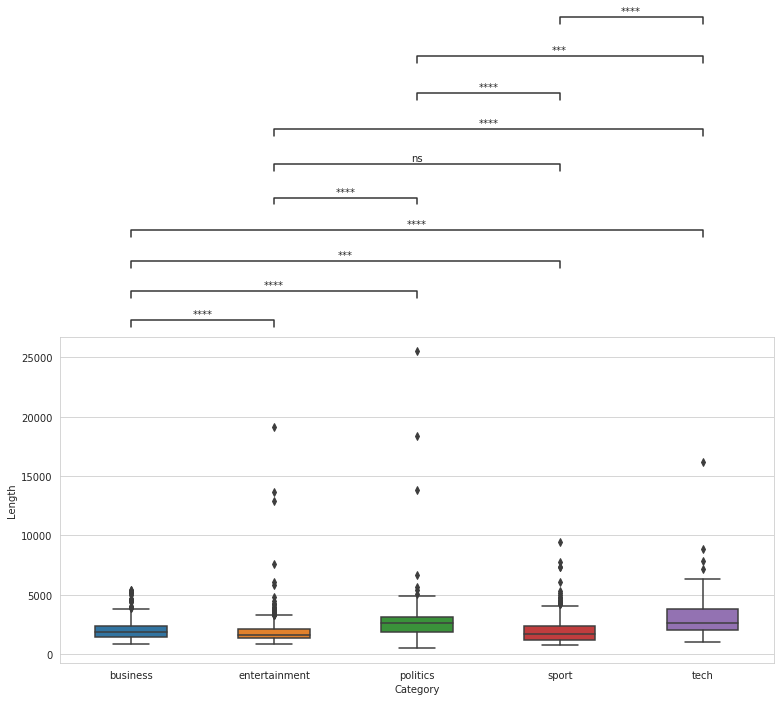

In [10]:
plt.figure(figsize=(12.8,6))
fig = sns.boxplot(data=df, x='Category', y='Length', width=.5)
add_stat_annotation(fig, 
                    data=df, 
                    x='Category', y='Length', 
                    order=['business', 'entertainment', 'politics', 'sport', 'tech'],
                    box_pairs=[("business", "entertainment"), 
                               ("business", "politics"), 
                               ("business", "sport"),
                               ("business", "tech"),
                               ("entertainment", "politics"),
                               ("entertainment", "sport"),
                               ("entertainment", "tech"),
                               ("politics", "sport"),
                               ("politics", "tech"),
                               ("sport", "tech")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

### Word clouds for every category will give a good overview of the contents of each category.

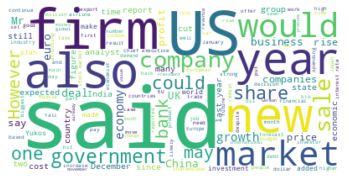

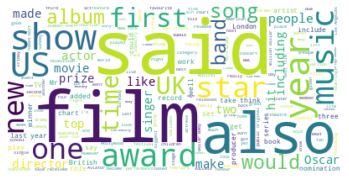

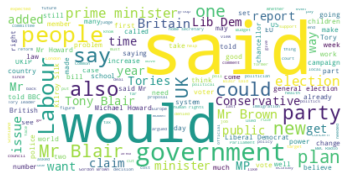

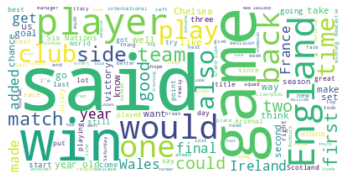

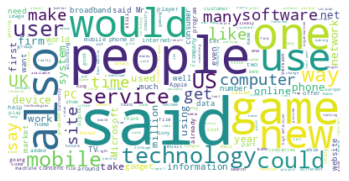

In [11]:
categories = df.Category.unique()
stop_words = list(stopwords.words('english'))

for i in categories:
    data_int = df[df["Category"] == i]
    text = " ".join(review for review in data_int.Text)
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Lastly, the average reading level of the label groups is a good indicator of the average verbage, syllable number and sentence length. 

In [12]:
for i in categories:
    data_int = df[df["Category"] == i]
    text = " ".join(review for review in data_int.Text)
    reading_level = Readability(text).smog()
    
    print("The average reading level of {} articles is {}. \n".format(i,reading_level.grade_level))



The average reading level of business articles is 13. 

The average reading level of entertainment articles is 13. 

The average reading level of politics articles is 13. 

The average reading level of sport articles is 10. 

The average reading level of tech articles is 12. 

